<ipython-input-1-c182ea2c4a50>:26: RuntimeWarning: overflow encountered in power
  return b * (np.e ** (a*x))


[-4.27694043e-03  2.23986858e+03]
[2239.86857878 2056.23858728 1887.66303876 1732.90773256 1590.83965088
 1460.41866354 1340.68991279 1230.77682253 1129.8746805  1037.24474679
  952.2088452   874.14439812  802.47986837  736.69057484  676.29485106
  620.85051877  569.95165062  523.22559814  480.33026354  440.95159506
  404.80128766  371.61467229  341.1487781   313.18055362  287.50523367
  263.93484025  242.29680625  222.43271204  204.19712563  187.4565379
  172.08838515  157.98015174  145.02854637  133.13874579  122.2237006
  112.20349793  103.00477638   94.56018887   86.80790964   79.69118151
   73.15790044   67.16023399   61.65427113   56.59970079   51.95951669
   47.69974641   43.78920268   40.19925504   36.90362023   33.87816975
   31.10075321   28.55103619   26.2103513    24.06156158   22.08893497
   20.2780292    18.61558598   17.08943399   15.68839973   14.40222574]
uncertainty of linear data 1.5366538250931512
uncertainty of expotential data 8.089910422449439
HALF LIFE= -157.553

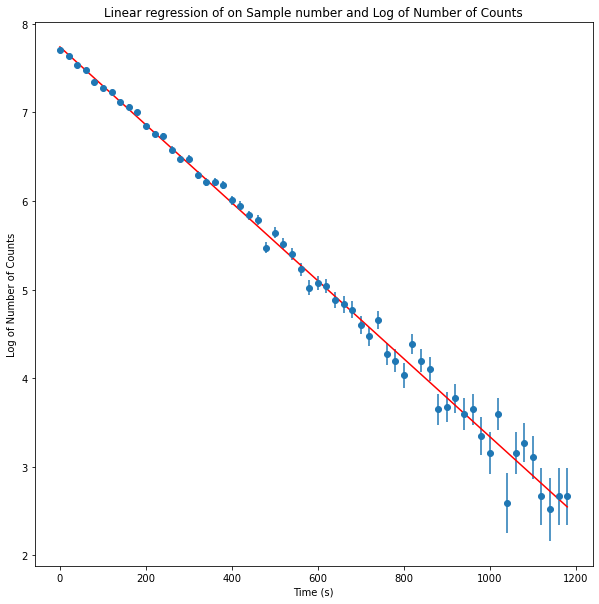

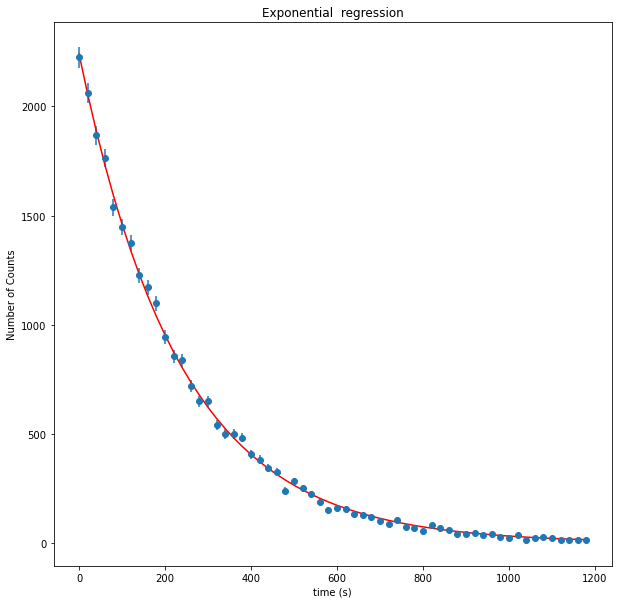

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf) # prints the whole array
from statistics import stdev 

def lin_func(x, a, b):
    """
    Linear function of x
    :param x: data to perform regression on
    :param a: slope param
    :param b: intercept param
    """
    
    return a*x + b
    
def exp_func(x, a, b):
    
    """
    Exponential function of x
    :param x: data to perform regression on
    :param a: coefficient
    :param b: coefficient
    """
    
    return b * (np.e ** (a*x))



background = np.loadtxt(fname = 'RadioactiveDecay_TuesdayOct2_2018_background.txt', delimiter = '\t', skiprows = 2) # reading data
decay = np.loadtxt(fname = 'RadioactiveDecay_TuesdayOct2_2018_decay.txt', delimiter = '\t', skiprows = 2)
indices =np.arange(0,1200,20)


rad_data = decay[:,1] - np.mean(background[:,1]) # subtracting mean background radiation from decay
rad_unc = np.sqrt(np.mean(background[:,1]) + decay[:,1]) # calculating uncertainty for each observation in decay file
                 
delta_t = 20 # in this case, delta_t is 20 seconds

# converting data to rates

rad_data_rates = rad_data/delta_t
rad_unc_rates = rad_unc/delta_t

# Generating data_line and data_exp using lin_func and exp_func:

data_params_line, _ = curve_fit(lin_func, indices, np.log(rad_data))
data_params_exp, _ = curve_fit(exp_func, indices, rad_data, p0 = (-1, 1))
print(data_params_exp)

data_line = lin_func(indices,data_params_line[0],data_params_line[1])
data_exp = exp_func(indices,data_params_exp[0], data_params_exp[1])

print(data_exp)

hl_line = np.log(2)/data_params_line[0]
hl_exp = np.log(2)/data_params_exp[0]

print("uncertainty of linear data", stdev(data_line))
print("uncertainty of expotential data", np.average(np.absolute(stdev(data_exp)/data_exp)))
print("HALF LIFE=", hl_line, hl_exp)

# Plotting log of number of counts against sample numbers

plt.figure(figsize = (10, 10))
plt.title("Linear regression of on Sample number and Log of Number of Counts")
plt.errorbar(indices, np.log(rad_data), xerr = None, yerr = (rad_unc/rad_data), fmt = 'o')
plt.plot(indices, data_line, color = 'r')
plt.xlabel('Time (s)'), plt.ylabel('Log of Number of Counts')
plt.savefig('1')

# Plotting number of counts against sample numbers

plt.figure(figsize = (10, 10))
plt.title("Exponential  regression")
plt.errorbar(indices, rad_data, xerr = None, yerr = rad_unc, fmt = 'o')
plt.plot(indices, data_exp, color = 'r')
plt.xlabel('time (s)'), plt.ylabel('Number of Counts')
plt.savefig('2')
plt.show()
